Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 50.6117 - mean_absolute_error: 5.5473 - val_loss: 58.6065 - val_mean_absolute_error: 6.8768
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 24.4994 - mean_absolute_error: 3.9080 - val_loss: 9.0527 - val_mean_absolute_error: 2.4062
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 18.9524 - mean_absolute_error: 3.4340 - val_loss: 57.0244 - val_mean_absolute_error: 6.8750
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 16.9921 - mean_absolute_error: 3.2367 - val_loss: 13.3235 - val_mean_absolute_error: 2.9843
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 16.2761 - mean_absolute_error: 3.1660 - val_loss: 17.0237 - val_mean_absolute_error: 3.4898
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 15.5359 - mean_absolute_error: 3.0798 - val_loss: 6.2767 - val_mean_absolute_error: 1.9722
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 14.3727 - mean_absolute_error

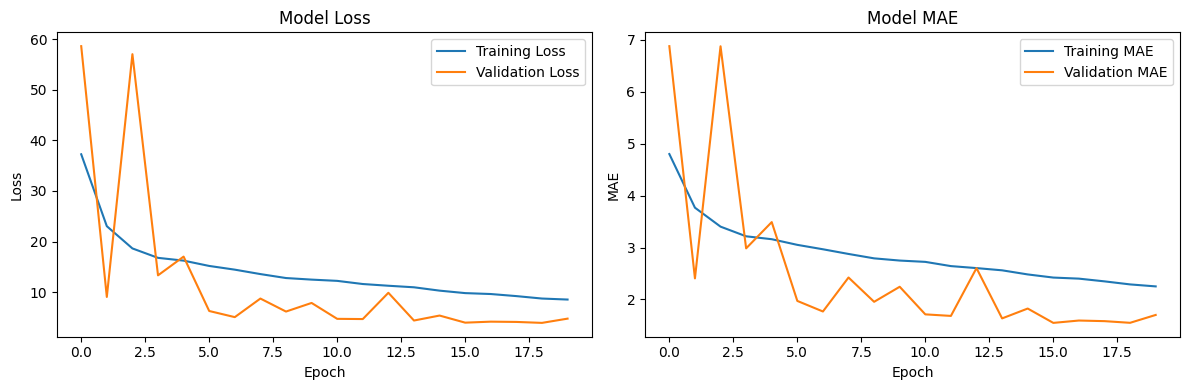


Final Training Metrics:
Training Loss: 8.5387
Validation Loss: 4.7669
Training MAE: 2.2520
Validation MAE: 1.7024


In [11]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def load_data():
    """
    Load and combine multiple training datasets and their corresponding labels.
    
    Returns:
        tuple: (X, y) where X is the combined image data and y is the combined labels
    """
    # Load individual datasets
    train_data1 = np.load('../Data/data0.npy')
    train_data2 = np.load('../Data/data1.npy')
    train_data3 = np.load('../Data/data2.npy')
    lab_data1 = np.load('../Data/lab0.npy')
    lab_data2 = np.load('../Data/lab1.npy')
    lab_data3 = np.load('../Data/lab2.npy')
    
    # Combine datasets
    X = np.concatenate([train_data1, train_data2, train_data3])
    y = np.concatenate([lab_data1, lab_data2, lab_data3])
    
    return X, y

def preprocess_data(X):
    """
    Preprocess the image data by reshaping and normalizing.
    
    Args:
        X (numpy.ndarray): Input image data
        
    Returns:
        numpy.ndarray: Preprocessed image data
    """
    X = X.reshape(-1, X.shape[1], X.shape[2], 1)  # Add channel dimension
    X = X / 255.0  # Normalize pixel values
    return X

def create_model(input_shape):
    """
    Create a CNN model for digit sum prediction.
    
    Args:
        input_shape (tuple): Shape of input images (height, width, channels)
        
    Returns:
        tensorflow.keras.Model: Compiled CNN model
    """
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Third Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        
        # Flatten and Dense layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1)  # Single output for sum prediction
    ])
    
    return model

# Load and preprocess data
X, y = load_data()
X = preprocess_data(X)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and compile model
model = create_model(input_shape=(X.shape[1], X.shape[2], 1))
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model with .keras extension
model.save('digit_sum_model.keras')

# Print final metrics
print("\nFinal Training Metrics:")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Training MAE: {history.history['mean_absolute_error'][-1]:.4f}")
print(f"Validation MAE: {history.history['val_mean_absolute_error'][-1]:.4f}")